<a href="https://colab.research.google.com/github/Ankita-17/Object-Detection-Using-YOLO-Algorithm/blob/main/Object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**GRIP @ THE SPARKs FOUNDATION**

## **Author:Ankita Modak**

## **Task1:-Object Detection**

In [ ]:
!pip install opencv-python

###To import the libraries openCV and numpy

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

###To run the algorythm we need three files


1.  ** Weight file**: It’s the trained model, the core of the algorythm to detect the objects.
2.   **Cfg file**: It’s the configuration file, where there are all the settings of the algorythm.
3. **Name files**: Contains the name of the objects that the algorythm can detect.

In [ ]:
#Load YOLO file
yolo=cv2.dnn.readNet("/content/yolov3-tiny.weights","/content/yolov3-tiny.cfg")

###We read the conents of Name files and make a list.

In [ ]:
classes=[]

with open("/content/coco.names",'r') as f:
  classes=f.read().splitlines()

In [ ]:
len(classes)

80

In [ ]:
#Name of the objects We can detect
print(classes)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


###We then load the image where we want to perform the object detection and we also get its width and height.

In [ ]:
img=cv2.imread("/content/IMG_6257.JPG")

In [ ]:
img=cv2.resize(img,None,fx=0.5,fy=0.5) # To resize the image

In [ ]:
height,width,channels=img.shape

###To Show the image on the screen.

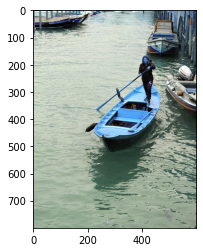

In [ ]:
plt.imshow(img)

###we can’t use right away the full image on the network, but first we need it to convert it to blob. Blob it’s used to extract feature from the image and to resize them. YOLO accepts three sizes:

1. 320×320 it’s small so less accuracy but better speed
2. 609×609 it’s bigger so high accuracy and slow speed
3. 416×416 it’s in the middle and you get a bit of both.

In [ ]:
new_im=cv2.dnn.blobFromImage(img,1/255,(320,320),(0,0,0),swapRB=True,crop=False)

In [ ]:
new_im.shape

(1, 3, 320, 320)

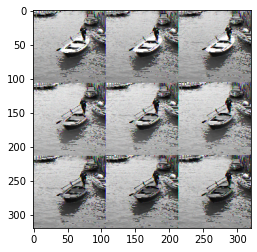

In [ ]:
#to print blob Image
i=new_im[0].reshape(320,320,3)
plt.imshow(i)

In [ ]:
yolo.setInput(new_im)

In [ ]:
##layeroutput is an array that conains all the informations about objects detected, their position and the confidence about the detection.
output_layers_name=yolo.getUnconnectedOutLayersNames()
layeroutput=yolo.forward(output_layers_name) # #it contains the result of the detection

###To show the result on the screen we then loop trough the outs array and calculate the confidence and we choose a confidence threshold.

In [ ]:
boxes=[]
confidences=[]
class_ids=[]

for output in layeroutput:
  for detection in output:
    score=detection[5:]
    class_id=np.argmax(score)
    confidence=score[class_id]
    #a threshold confidence of 0.5 has been set, if it’s greater we consider the object correctly detected, otherwise we skip it.
    if confidence>0.5:
      center_x=int(detection[0]* width)
      center_y=int(detection[1]*height)
      w=int(detection[2]*width)
      h=int(detection[3]*height)
     # Rectangle_Coordinate
      x=int(center_x-w/2)
      y=int(center_y-h/2)

      #cv2.circle(img,(center_x,center_y),10,(0,255,0),2)


      boxes.append([x,y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_id)



In [ ]:
len(boxes)

5

###When we perform the detection, it happens that we have more boxes for the same object, so we should use another function to remove this “noise”.
It’s called **Non maximum suppresion**.

In [ ]:
indexes=cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)

###To choose font and color

In [ ]:
font=cv2.FONT_HERSHEY_PLAIN
colors=np.random.uniform(0,255,size=(len(boxes),3))

###We finally extract all the informations and show them on the screen.

**Box**: contain the coordinates of the rectangle sorrounding the object detected.
**Label**: it’s the name of the object detected
**Confidence**: the confidence about the detection from 0 to 1.

In [ ]:
for i in indexes.flatten():
  x,y,w,h=boxes[i]

  label=str(classes[class_ids[i]])
  confi=str(round(confidences[i],2))
  color=colors[i]
  #to draw a rectangle arround the detected objects
  cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
  cv2.putText(img, label+" "+confi,(x,y+20),font,1,(0,255,0),2 )

###To show the image with detected object

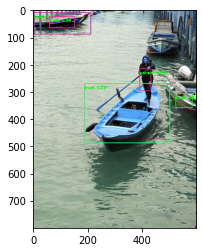

In [ ]:
plt.imshow(img)

###To save it as a jpg format in a cuurent folder

In [ ]:
cv2.imwrite("./img.jpg",img)

True